# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, GlobalMaxPooling2D
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


# Functions

In [4]:
def get_images(df):
    images = []
    
    for idx, row in df.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)

        # Pre-Processing:
        #  - (Re)scaling
        #  - Standardization
        #  - Stretching
        #  - ...
        # band_1 /= 255
        # band_2 /= 255
        

        bands = np.dstack((band_1, band_2))
        images.append(bands)
        
    return np.array(images)


def plot_acc(histobj):
    plt.plot(histobj.history['acc'])
    plt.plot(histobj.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    
def plot_loss(histobj):
    plt.plot(histobj.history['loss'])
    plt.plot(histobj.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

# Import data


In [5]:
train_df = pd.read_json('data/train.json', dtype='float32')
# test_df = pd.read_json('data/test.json')

In [6]:
X = get_images(train_df)
Y = to_categorical(train_df.is_iceberg.values, num_classes=2) # [0. 1.]=iceberg, [1. 0.]=ship

In [7]:
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, test_size=0.10,  shuffle=True, random_state=12)

# CNN Model Configuration

In [8]:
model = Sequential()
model.add(BatchNormalization(input_shape = (75, 75, 2)))
for i in range(4):
    model.add(Conv2D(8*2**i, kernel_size = (3,3)))
    model.add(MaxPooling2D((2,2)))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 75, 75, 2)         8         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 8)         152       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
__________

In [9]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
model_hist = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), batch_size=32, epochs=10)

Train on 1443 samples, validate on 161 samples
Epoch 1/10
1443/1443 [==============================] - 4s 3ms/step - loss: 0.7359 - acc: 0.6112 - val_loss: 1.0557 - val_acc: 0.6087
Epoch 2/10
1443/1443 [==============================] - 3s 2ms/step - loss: 0.5439 - acc: 0.6972 - val_loss: 0.5129 - val_acc: 0.6646
Epoch 3/10
1443/1443 [==============================] - 4s 2ms/step - loss: 0.4744 - acc: 0.7526 - val_loss: 0.3822 - val_acc: 0.8075
Epoch 4/10
1443/1443 [==============================] - 4s 2ms/step - loss: 0.4271 - acc: 0.7942 - val_loss: 0.3896 - val_acc: 0.8075
Epoch 5/10
1443/1443 [==============================] - 4s 3ms/step - loss: 0.3654 - acc: 0.8267 - val_loss: 0.2950 - val_acc: 0.8385
Epoch 6/10
1443/1443 [==============================] - 4s 2ms/step - loss: 0.3606 - acc: 0.8295 - val_loss: 0.3230 - val_acc: 0.8571
Epoch 7/10
1443/1443 [==============================] - 4s 3ms/step - loss: 0.3556 - acc: 0.8358 - val_loss: 0.3248 - val_acc: 0.8199
Epoch 8/10
1443

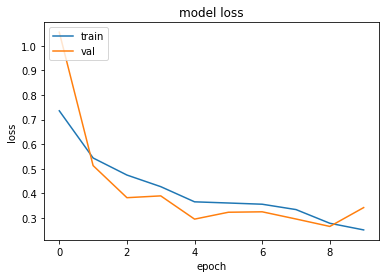

In [11]:
plot_loss(model_hist)

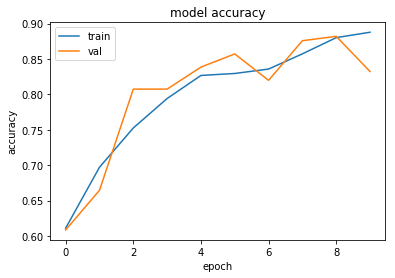

In [12]:
plot_acc(model_hist)